<a href="https://colab.research.google.com/github/kiranp7/Twitter-sentiment-analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
twitter_data = pd.read_csv('/content/drive/MyDrive/twitter_training.csv')
twitter_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data.shape

(74681, 4)

In [ ]:
column_names = ['Tweet_ID', 'entity','sentiment','Tweet_content']
twitter_data = pd.read_csv('/content/drive/MyDrive/twitter_training.csv',names=column_names)
twitter_data.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
twitter_data.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

In [ ]:
twitter_data.dropna(subset=['Tweet_content'], inplace=True)

In [ ]:
twitter_data.isnull().sum()

Tweet_ID         0
entity           0
sentiment        0
Tweet_content    0
dtype: int64

In [ ]:
twitter_data.shape

(73996, 4)

In [ ]:
twitter_data['sentiment'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

In [ ]:
twitter_data.replace({'sentiment':{'Negative':0,'Positive':1,'Neutral':1,'Irrelevant':1}}, inplace=True)

In [ ]:
twitter_data.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data['sentiment'].value_counts()

1    51638
0    22358
Name: sentiment, dtype: int64

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
twitter_data['stemmed_content'] = twitter_data['Tweet_content'].apply(stemming)


In [ ]:
twitter_data

,Tweet_ID,entity,sentiment,Tweet_content,stemmed_content
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,1,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,1,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,im get borderland murder
...,...,...,...,...,...
74677,9200,Nvidia,1,Just realized that the Windows partition of my...,realiz window partit mac like year behind nvid...
74678,9200,Nvidia,1,Just realized that my Mac window partition is ...,realiz mac window partit year behind nvidia dr...
74679,9200,Nvidia,1,Just realized the windows partition of my Mac ...,realiz window partit mac year behind nvidia dr...
74680,9200,Nvidia,1,Just realized between the windows partition of...,realiz window partit mac like year behind nvid...


<Axes: xlabel='sentiment', ylabel='count'>

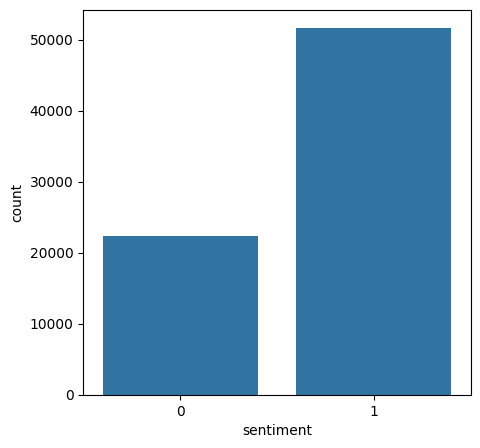

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = twitter_data)

In [ ]:
X = twitter_data['stemmed_content'].values

y = twitter_data['sentiment'].values

In [ ]:
print(X)

['im get borderland murder' 'come border kill' 'im get borderland kill'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state= 2)

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 17519)	0.29900125839689956
  (0, 18255)	0.22227599326259756
  (0, 20326)	0.26578573175618436
  (0, 13662)	0.3042140745449212
  (0, 8783)	0.3550442671637327
  (0, 20639)	0.2371797293710701
  (0, 17062)	0.2768689930136879
  (0, 16431)	0.6072676155447558
  (0, 7811)	0.2650704059068267
  (1, 14650)	0.5834952678620234
  (1, 8426)	0.5834952678620234
  (1, 3302)	0.17009947586672988
  (1, 19074)	0.21773750915007276
  (1, 13771)	0.2166064617350973
  (1, 15389)	0.2942452749382482
  (1, 16508)	0.24268102037896344
  (1, 6689)	0.2243443144881957
  (2, 13826)	0.30228689454679925
  (2, 19409)	0.3260082203027527
  (2, 288)	0.31042913052850307
  (2, 18899)	0.33656500715654153
  (2, 18742)	0.31182933038979466
  (2, 1220)	0.2038303600422235
  (2, 17969)	0.2553726546678671
  (2, 13997)	0.37129213024009394
  :	:
  (59194, 4423)	0.25364622667123043
  (59194, 14115)	0.18078442752220525
  (59194, 8947)	0.22084557560230966
  (59194, 8725)	0.20942734216336042
  (59194, 11896)	0.23611047316241815
  (59194,

In [ ]:
print(X_test)

  (0, 19402)	0.3084935759011913
  (0, 17059)	0.40222012150641767
  (0, 16809)	0.562221334791117
  (0, 7052)	0.5316917830945945
  (0, 6481)	0.37981799059344695
  (1, 18855)	0.8690668211974404
  (1, 18255)	0.4946947142367466
  (2, 20464)	0.5816023559830249
  (2, 20153)	0.11973185160366676
  (2, 19566)	0.2752767861256765
  (2, 19402)	0.11047446360651669
  (2, 17955)	0.26095880468687693
  (2, 17430)	0.17182809748397715
  (2, 15447)	0.13135368685206933
  (2, 14065)	0.2752767861256765
  (2, 12439)	0.14615156844802743
  (2, 12003)	0.12321971873530445
  (2, 11362)	0.17572999403983197
  (2, 10247)	0.13153213289210322
  (2, 8592)	0.2827461049465635
  (2, 7353)	0.12000936731868914
  (2, 7158)	0.16639928056908299
  (2, 3227)	0.17306470246142913
  (2, 3143)	0.19782279558461263
  (2, 2377)	0.15506797003637005
  :	:
  (14799, 21078)	0.16839411350173059
  (14799, 20664)	0.1481391883139801
  (14799, 19074)	0.09791812177170325
  (14799, 18762)	0.2855672670067629
  (14799, 17767)	0.14743310545344812
  (1

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, X_train_pred)
accuracy

0.8856172714372593

In [ ]:
print("Accuracy score on the training data: ",accuracy*100)

Accuracy score on the training data:  88.56172714372593


In [ ]:
X_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, X_test_pred)

In [ ]:
print("Accuracy score on the testing data: ",accuracy*100)

Accuracy score on the testing data:  86.5608108108108
